# Processamento de linguagem natural com NLTK E SPACY

In [70]:
import bs4 as bs #BEAUTFULL SOUP Para customizacao do ambiente
import urllib.request # Para requisicoes web
import nltk # Bibloteca de processamento de textos
import spacy # Biblioteca para processamento de TEXTO
from spacy.lang.pt.examples import sentences # PARA LINGUA PORTUGUESA

# Marcacao POS
* POS (part-of-speech) atribui para as palavras partes da fala como substantivos, adjectivos, verbos
* Detecta entidades no texto


In [71]:
pln = spacy.load('pt_core_news_sm') # Criacao de objeto para identificacao de palavras em portugues
pln

In [72]:
Documento = pln('Leonel Silima e bonito e Estava a Estudar Mestrado em Informatica Aplicada')
type(Documento) # verificar o tipo

spacy.tokens.doc.Doc

In [73]:
for token in Documento:
    print(token.text, token.pos_) # PARA IMPRIMIR PALAVRAS E RESPETIVAS CATEGORIAS GRAMATICAIS

Leonel PROPN
Silima PROPN
e CCONJ
bonito ADJ
e CCONJ
Estava VERB
a SCONJ
Estudar PROPN
Mestrado PROPN
em ADP
Informatica PROPN
Aplicada PROPN


# Lematizacao

In [74]:
for token in Documento:
    print(token.text, token.lemma_) # Para reducao da dimensionalidade das palavras retirando a palavra CHAVE

Leonel Leonel
Silima Silima
e e
bonito bonito
e e
Estava Estar
a a
Estudar Estudar
Mestrado Mestrado
em em
Informatica Informatica
Aplicada Aplicada


In [75]:
doc = pln ('Encontrei encontramos, encontra-se encotrária encontro desencontro cursária cursos cursado cursaram')
[token.lemma_ for token in doc]

['Encontrei',
 'encontrar',
 ',',
 'encontrar se',
 'encotrár',
 'encontro',
 'desencontro',
 'cursár',
 'curso',
 'cursar',
 'cursar']

# NLTK

In [76]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\leone\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [77]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('portugues aprender') # LOGO STEMMER NAO EH BOM PARA PROCESSAMENTO DE TEXTOS

'portugues aprend'

In [78]:
for token in Documento:
    print(token.text, token.lemma_, stemmer.stem(token.text)) # LEMMA E STEMMER

Leonel Leonel leonel
Silima Silima sil
e e e
bonito bonito bonit
e e e
Estava Estar est
a a a
Estudar Estudar estud
Mestrado Mestrado mestr
em em em
Informatica Informatica informa
Aplicada Aplicada aplic


# Carregamento de dados web e extracao do conteudo

In [79]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')
dados #CARREGAMENTO DO LINK

In [80]:
# LEITURA DOS DADOS
data = dados.read()
data

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"5c2e1025-2541-481b-937d-d425528d6da3","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":64867398,"wgRevisionId":64867398,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 ingl\xc3\xaas-fontes e

In [81]:
# LEITURA DAS TAGS HTML
dados_html = bs.BeautifulSoup(data, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"5c2e1025-2541-481b-937d-d425528d6da3","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":64867398,"wgRevisionId":64867398,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 inglês-fontes em língua (en)","!CS1 manut: Nomes múltiplos: lista de autores","!CS1 manut: 

In [82]:
paragrafo = dados_html.find_all('p') # localizar todos paragrafos
paragrafo 

[<p>
 				Páginas para editores sem sessão iniciada <a aria-label="Saiba mais sobre edição" href="/wiki/Ajuda:Introduction"><span>saber mais</span></a>
 </p>,
 <p>Na <a href="/wiki/Tecnologia" title="Tecnologia">tecnologia</a>, a <b>Inteligência Artificial</b> (de sigla: <b>IA</b>; do <a href="/wiki/L%C3%ADngua_inglesa" title="Língua inglesa">inglês</a>: <i>Artificial Intelligence</i>, de sigla: <b>AI</b>) é a <a href="/wiki/Intelig%C3%AAncia" title="Inteligência">inteligência</a> demonstrada por <a href="/wiki/M%C3%A1quina" title="Máquina">máquinas</a> ao executar tarefas complexas associadas a seres inteligentes,<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span>[</span>1<span>]</span></a></sup> além de também ser um campo de estudo acadêmico,<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span>[</span>2<span>]</span></a></sup> no qual o principal objetivo é de executar funções de modo autônomo. 
 </p>,
 <p>É um conceito amplo e que recebe tantas defin

In [83]:
len(paragrafo) # contar o numero de paragrafos

106

In [84]:
paragrafo[5].text # visualizacao do conteudo do paragrado

'A questão sobre o que é "inteligência artificial", mesmo como definida anteriormente, pode ser separada em duas partes: "qual a natureza do artificial" e "o que é inteligência". A primeira questão é de resolução relativamente fácil, apontando no entanto para a questão de o que poderá o homem construir.\n'

In [85]:
# VISUALIZACAO DE TODO CONTEUDO DA PAGINA
conteudo = ''
for p in paragrafo:
    conteudo += p.text

In [86]:
conteudo

'\n\t\t\t\tPáginas para editores sem sessão iniciada saber mais\nNa tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. \nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]\nO de

In [87]:
minusculas = conteudo.lower()
minusculas

'\n\t\t\t\tpáginas para editores sem sessão iniciada saber mais\nna tecnologia, a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] no qual o principal objetivo é de executar funções de modo autônomo. \né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[3]\no de

# OUTRA FORMA OR ANOTHER WAY

In [88]:
import urllib.request

In [89]:
Link = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')
print("result code: "+ str(Link.getcode()))

result code: 200


In [90]:
data = Link.read()
print(data)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"5c2e1025-2541-481b-937d-d425528d6da3","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":64867398,"wgRevisionId":64867398,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 ingl\xc3\xaas-fontes e

In [91]:
data_html = bs.BeautifulSoup(data, 'lxml')
data_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"5c2e1025-2541-481b-937d-d425528d6da3","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":64867398,"wgRevisionId":64867398,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 inglês-fontes em língua (en)","!CS1 manut: Nomes múltiplos: lista de autores","!CS1 manut: 

In [92]:
link_num = dados_html.find_all('a') # to find all linfks from page
link_num

[<a class="mw-jump-link" href="#bodyContent">Saltar para o conteúdo</a>,
 <a class="mw-logo" href="/wiki/Wikip%C3%A9dia:P%C3%A1gina_principal">
 <img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/icons/wikipedia.png" width="50"/>
 <span class="mw-logo-container">
 <img alt="Wikipédia" class="mw-logo-wordmark" src="/static/images/mobile/copyright/wikipedia-wordmark-fr.svg" style="width: 7.5em; height: 1.125em;"/>
 <img alt="" class="mw-logo-tagline" height="13" src="/static/images/mobile/copyright/wikipedia-tagline-pt.svg" style="width: 7.5em; height: 0.8125em;" width="120"/>
 </span>
 </a>,
 <a accesskey="f" class="mw-ui-button mw-ui-quiet mw-ui-icon mw-ui-icon-element mw-ui-icon-wikimedia-search search-toggle" href="/wiki/Especial:Pesquisar" title="Pesquisar na Wikipédia [f]">
 <span>Busca</span>
 </a>,
 <a href="/w/index.php?title=Especial:Criar_conta&amp;returnto=Intelig%C3%AAncia+artificial" title="É encorajado a criar uma conta e iniciar sessão; no

In [93]:
len(link_num)

1637

In [94]:
link_num[0].text

'Saltar para o conteúdo'

# BUSCA DE PALAVRAS EM TEXTOS COM SPACY

In [95]:
pln = spacy.load('pt_core_news_sm')
pln

In [96]:
string = 'turing' # sELECIONAR O TERMO A PESQUISAR NO TEXTO
token_pesquisa = pln(string)

In [97]:
pln.vocab # Para identificar as categorias gramaticais das palavras

In [98]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEACH', None, token_pesquisa)

In [99]:
document = pln(minusculas)
matches = matcher(document)
matches

[(11114958440337685737, 3027, 3028),
 (11114958440337685737, 3037, 3038),
 (11114958440337685737, 3193, 3194),
 (11114958440337685737, 3198, 3199),
 (11114958440337685737, 3204, 3205),
 (11114958440337685737, 3267, 3268),
 (11114958440337685737, 3894, 3895),
 (11114958440337685737, 5159, 5160),
 (11114958440337685737, 8610, 8611),
 (11114958440337685737, 8745, 8746),
 (11114958440337685737, 8840, 8841),
 (11114958440337685737, 8957, 8958)]

In [100]:
document[3027:3028] # Localizar a palavra com base no indice

turing

In [101]:
# Localizar 5 palavras anteriores e 15 posteriores
document[3027 - 5:3028 +15]

uma contribuição prática de alan turing foi o que se chamou depois de teste de turing (tt),[24] de 1950

In [102]:
# Outra busca noutro intervalo 
document[8957 - 14: 8958 + 54]


informático indiano naturalizado estadunidense, foi o primeiro asiático a vencer o prêmio turing. entre suas contribuições para a ia estão a criação do instituto de robótica da cmu e demonstrações de diversos sistemas que usam alguma forma de ia. entre esses sistemas, estão sistemas de: fala, controlados por voz, reconhecimento de voz, reconhecimento de voz independente do interlocutor, etc.

In [103]:
# ACESSAR INDICES
matches[0:1]

[(11114958440337685737, 3027, 3028)]

In [104]:
# ABRIR OS RESULTADOS NO FORMATO HTML
from IPython.core.display import HTML
numero_palavras = 50
documents = pln(minusculas)
matches = matcher(documents)

display(HTML(f'<h1> {string.upper()}</h1>'))
display(HTML(f"""<p> <strong> Resultados encontrados: </strong> {len(matches)} </p>"""))
for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto = str(documents[inicio: i[2] + numero_palavras]).replace(string, f"<mark> <strong>{string}</strong></mark>")
    display(HTML(f""" ...{texto}... """))

# Extracao de entidades nomeadas no texto e respetivas categorias

In [105]:
entidades = spacy.load('pt_core_news_sm')
entidades

In [106]:
# Chamar as entidades do document e suas categorias 
for entidade in document.ents:
    print(entidade.text, entidade.label_)

segunda guerra mundial MISC
computing machinery and intelligence" do matemático MISC
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
google ORG
john mccarthy PER
herbert simon PER
john mccarthy PER
newell PER
brasil LOC
allen newell PER
herbert simon PER
mit ORG
darthmouth LOC
japão LOC
andreas kaplan PER
john PER
john PER
good MISC
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac PER
steven spielberg PER
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
java MISC
john searle PER
hubert PER
searle PER
minsky PER
turing PER
mit ORG
mark i PER
frank rosenblatt PER
charles wightman PER
jean-françois lyotard LOC
lucien sfez PER
daniel dennett PER
dennett PER
simon blackburn PER
searle - PER
minsky PER
minsky PER
rosenblatt PER
bernard widrow PER
minsky PER
allen newell PER
herbert simon PER
lisp MISC
mit ORG
seymour papert PER
te

# Para identificar entidades e categorias

In [107]:
from spacy import displacy
displacy.render(document, style = 'ent', jupyter = True)

# Nuvem de palavras

In [108]:
# Remocao de STOP_WORDS 
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'tuas', 'vais', 'ou', 'quatro', 'todas', 'esse', 'parece', 'favor', 'tipo', 'vossas', 'corrente', 'fazemos', 'possível', 'nuns', 'nem', 'que', 'nossos', 'falta', 'era', 'põe', 'dão', 'sabe', 'quarto', 'para', 'três', 'dezanove', 'mal', 'dos', 'máximo', 'poderá', 'sétimo', 'catorze', 'se', 'fora', 'certamente', 'quinze', 'vossos', 'valor', 'em', 'parte', 'tiveste', 'vem', 'custa', 'tarde', 'desse', 'sempre', 'breve', 'exemplo', 'fazia', 'zero', 'sei', 'neste', 'treze', 'qual', 'quando', 'desta', 'mesmo', 'pouca', 'e', 'novos', 'ambos', 'ali', 'diante', 'debaixo', 'pelas', 'teus', 'eventual', 'momento', 'seu', 'fostes', 'como', 'posição', 'sim', 'naquele', 'querem', 'cuja', 'terceira', 'foste', 'boa', 'apenas', 'então', 'número', 'isto', 'pontos', 'onze', 'ponto', 'desde', 'vinte', 'veja', 'duas', 'com', 'quero', 'na', 'vezes', 'são', 'toda', 'tentei', 'sistema', 'pouco', 'aquela', 'tão', 'maioria', 'vêm', 'quarta', 'esteve', 'tentar', 'dois', 'o', 'nossas', 'ser', 'povo', 'nesta', 'daq

In [109]:
len(STOP_WORDS)

416

In [118]:
# convertendo string em lista
Listagem = pln(conteudo)
lista_token = []
for token in Listagem:
    lista_token.append(token.text)
print(lista_token)

['\n\t\t\t\t', 'Páginas', 'para', 'editores', 'sem', 'sessão', 'iniciada', 'saber', 'mais', '\n', 'Na', 'tecnologia', ',', 'a', 'Inteligência', 'Artificial', '(', 'de', 'sigla', ':', 'IA', ';', 'do', 'inglês', ':', 'Artificial', 'Intelligence', ',', 'de', 'sigla', ':', 'AI', ')', 'é', 'a', 'inteligência', 'demonstrada', 'por', 'máquinas', 'ao', 'executar', 'tarefas', 'complexas', 'associadas', 'a', 'seres', 'inteligentes,[1', ']', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico,[2', ']', 'no', 'qual', 'o', 'principal', 'objetivo', 'é', 'de', 'executar', 'funções', 'de', 'modo', 'autônomo', '.', '\n', 'É', 'um', 'conceito', 'amplo', 'e', 'que', 'recebe', 'tantas', 'definições', 'quanto', 'significados', 'diferentes', 'à', 'palavra', 'inteligência.[3', ']', 'É', 'possível', 'considerar', 'algumas', 'características', 'básicas', 'desses', 'sistemas', ',', 'como', 'a', 'capacidade', 'de', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'a', 'um', 'conjunto', 'de

In [121]:
len(lista_token)

9880

In [127]:
# removendo stop_words
sem_stop = []
for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)

In [131]:
print(sem_stop)

['\n\t\t\t\t', 'Páginas', 'editores', 'sessão', 'iniciada', '\n', 'tecnologia', ',', 'Inteligência', 'Artificial', '(', 'sigla', ':', 'IA', ';', 'inglês', ':', 'Artificial', 'Intelligence', ',', 'sigla', ':', 'AI', ')', 'inteligência', 'demonstrada', 'máquinas', 'executar', 'tarefas', 'complexas', 'associadas', 'seres', 'inteligentes,[1', ']', 'campo', 'estudo', 'acadêmico,[2', ']', 'principal', 'objetivo', 'executar', 'funções', 'modo', 'autônomo', '.', '\n', 'conceito', 'amplo', 'recebe', 'tantas', 'definições', 'significados', 'diferentes', 'palavra', 'inteligência.[3', ']', 'considerar', 'características', 'básicas', 'desses', 'sistemas', ',', 'capacidade', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'conjunto', 'dados', 'disponíveis', 'chegar', 'conclusão', ')', ',', 'aprendizagem', '(', 'aprender', 'erros', 'acertos', 'futuro', 'possa', 'agir', 'maneira', 'eficaz', ')', ',', 'reconhecer', 'padrões', '(', 'padrões', 'visuais', 'sensoriais', ',', 'padrões', 'comportamento', 

In [132]:
len(sem_stop)

5773

In [133]:
# para ver se uma palavra eh sop_word
pln.vocab['usa'].is_stop

True

In [134]:
# DEFINICAO DAS CORES DA NUVEM DE PALAVRAS
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta', 'blue'])

In [135]:
# BIBLIOTECA PARA NUVEM DAS PALAVRAS
from wordcloud import WordCloud
nuvem = WordCloud(background_color = 'white', max_words =70, colormap = color_map)

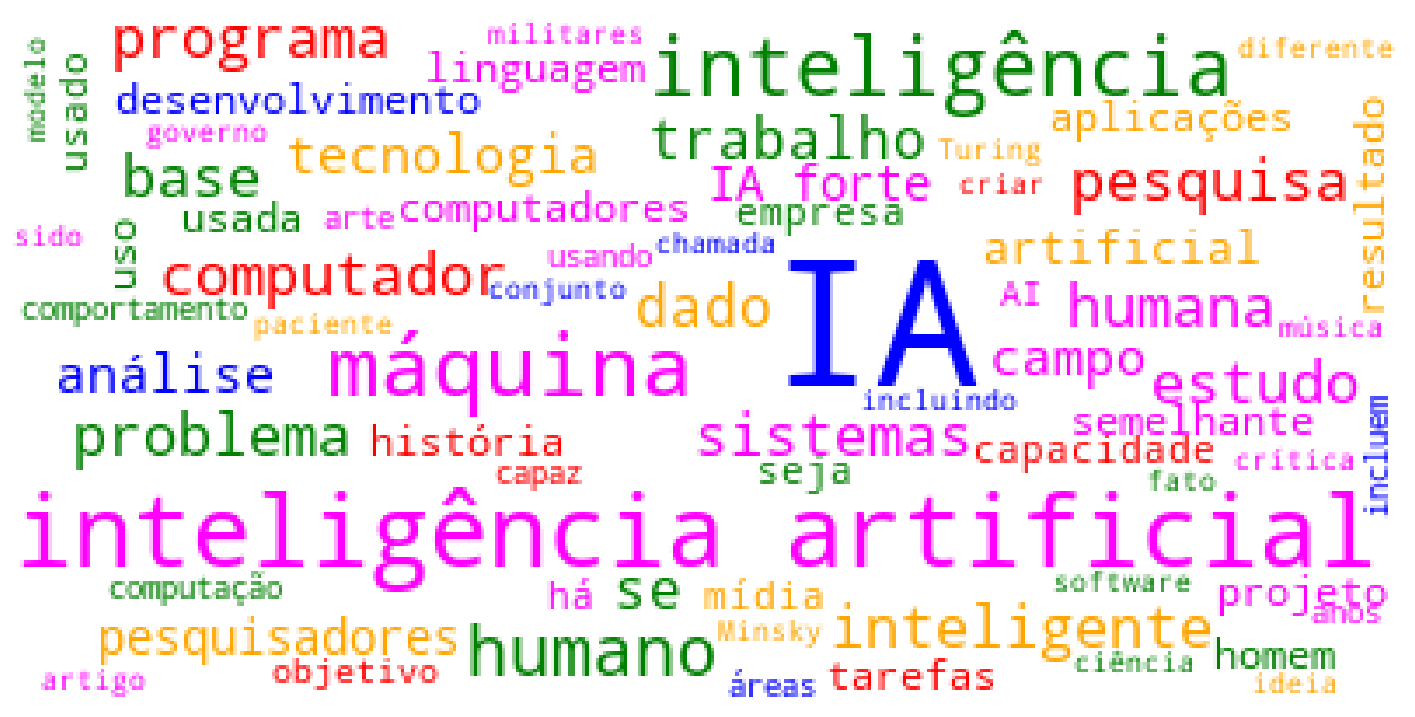

In [138]:
# PARA VISUALIZACAO
import matplotlib.pyplot as plt
nuvem = nuvem.generate(' '.join(sem_stop))
plt.figure(figsize = (18, 18))
plt.imshow(nuvem)
plt.axis('off')
plt.show()